# Google Image Scrapping

## Description
-- This project is regarding Image scrapping from GOOGLE

### Prerequisites libraries/modules

1. Beautiful soup library
2. Request Module
3. Logging Module ()

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen as uReq
import logging
import os

In [2]:
#creating directory folder where we will save images

save_dir = "images/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
#Sometime websites got slow that is why used below code
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebkit/534.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.56"}

In [4]:
# Searching from query about images with quesry
# We had done changes in {query} so we can pass any response from search

query= "Abdul Kalam"
response= requests.get(f"https://www.google.com/search?sca_esv=338d7d94e3deedef&sca_upv=1&rlz=1C1CHBD_enIN1127IN1127&sxsrf=ADLYWII3uG2IuQ-RTWONRi4cpcu7-6WOkQ:1727591159638&q={query}&udm=2&fbs=AEQNm0AeMNWKf4PpcKMI-eSa16lJoRPMIuyspCxWO6iZW9F1Ns6EVsgc0W_0xN47PHaanAEtg26fpfc9gg2y1-ZsywNNvFNsUhDWR4E0wi7xGg-xrf_Sy9bzTMgYml2XYO8-wGBzdYyjgm1GxUgrzQRgc4dMk-rxWBBU74weqHI1oXOBcIzqHLRs2wmN3kdZa-sR8S7dDD-YaL4NK2a5JkTHeKoYpFindg&sa=X&sqi=2&ved=2ahUKEwiNr4zLwueIAxWQSmwGHeneEsAQtKgLegQIExAB&biw=697&bih=663&dpr=1.38")

In [5]:
response

<Response [200]>

In [6]:
# Converting Response List with help of BeautifulSoup in html code

Soup= BeautifulSoup(response.content, 'html.parser')

In [7]:
Soup

<!DOCTYPE html PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.0//EN" "http://www.wapforum.org/DTD/xhtml-mobile10.dtd">
<html lang="en-IN" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="application/xhtml+xml; charset=utf-8" http-equiv="Content-Type"/><meta content="no-cache" name="Cache-Control"/><title>Abdul Kalam - Google Search</title><style>a{text-decoration:none;color:inherit}a:hover{text-decoration:underline}a img{border:0}body{font-family:arial,sans-serif;padding:8px;margin:0 auto;max-width:700px;min-width:240px;}.FbhRzb{border-left:thin solid #dadce0;border-right:thin solid #dadce0;border-top:thin solid #dadce0;height:40px;overflow:hidden}.n692Zd{margin-bottom:10px}.cvifge{height:40px;border-spacing:0}.QvGUP{height:40px;padding:0 8px 0 8px;vertical-align:top}.O4cRJf{height:40px;width:100%;padding:0;padding-right:14px}.O1ePr{height:40px;padding:0;vertical-align:top}.kgJEQe{height:36px;width:98px;vertical-align:top;margin-top:4px}.lXLRf{vertical-align:top}.MhzMZd{border:0;vert

In [8]:
# extracting only images from above html code

images_tags= Soup.find_all("img")

In [9]:
images_tags

[<img alt="Google" class="kgJEQe" src="/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0lRN-RRN8ng5yOlxswQdxgXbTabw0NG952S3XcMS6Fzz8OtNspm-P-f3VHA&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTL6n37MEBVh31hBt9vp_P6rarW4FvUZLWWzVCqNF6s4py2gP3pWvfYgpM6wQ&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNluG8RYbAkc9DDoEIJa5R0dW5VG9LjQdk7PDhJN6GzNTJ3zjUmrO_LodkpQ&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmwxHSTRRio5VQ08CSZenf0XHHxbHIxOXAZNCzMg_x8RbRgifCbPsgeIKlVA&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRswFuxGJHH0jbRDVeJ8vmEj_RoMHX6jt8Ijin_L5R05pbrpYkSO9ydekSUAd4&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSIc7kqbQll

In [10]:
len(images_tags)

21

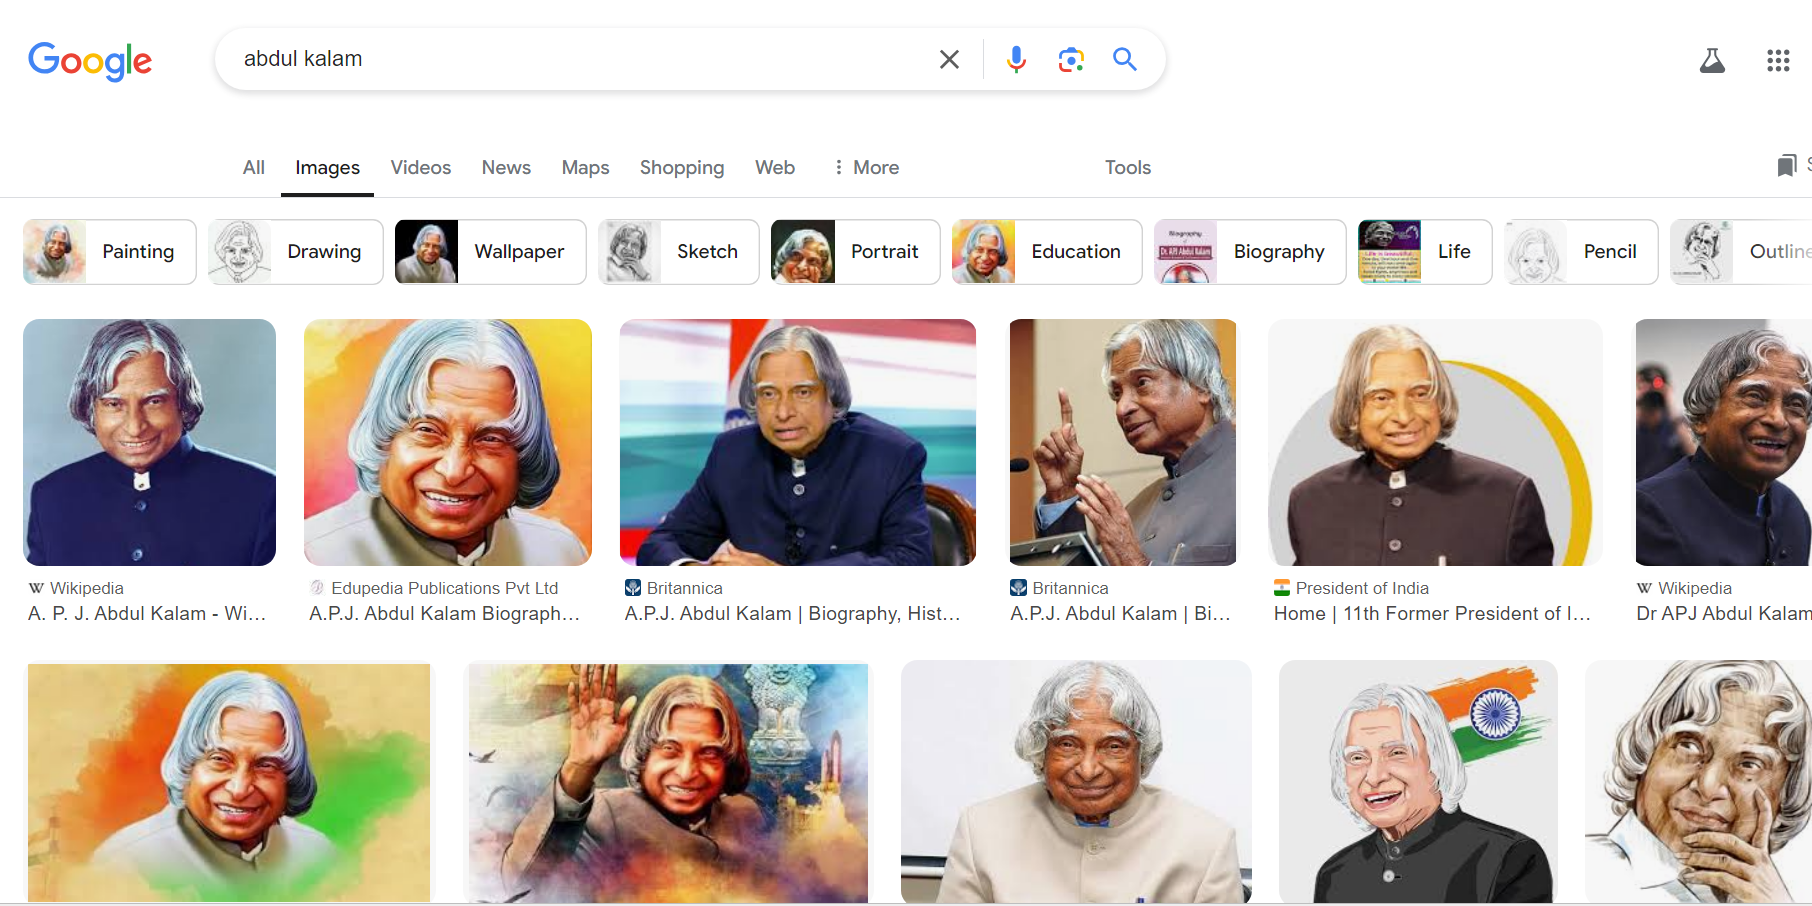

In [11]:
# It is counting tha above little imaes strips as well so deleting that first strip
del images_tags[0]

In [12]:
# getting URL one by one and saving it 
img_data_mongo=[]

for i in images_tags:
    image_url=i['src']
    image_data = requests.get(image_url).content
    my_dictionary = {"index": image_url, "image": image_data}
    img_data_mongo.append(my_dictionary)

    with open(os.path.join(save_dir, f"{query}_{images_tags.index(i)}.jpg"), "wb") as f:
        f.write(image_data)